# Модуль 2. **Дослідницький аналіз даних**

## Частина третя: Аналіз датасет c Kaggle.com

In [550]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Прочитайте csv файл (використовуйте функцію read_csv)

In [551]:
df = pd.read_csv("bestsellers with categories.csv")
# df

#### Виведіть перші п'ять рядків (використовується функція head)

In [552]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### Виведіть розміри датасету (використовуйте атрибут shape)

In [553]:
print("рядків  :", df.shape[0])
print("стовпців:  ", df.shape[1])

рядків  : 550
стовпців:   7


> ##### Про скільки книг зберігає дані датасет? **Відповідь: 351**

In [554]:
df["Name"].nunique()

351

#### Для спрощення подальшої роботи давайте трохи підправимо назви змінних. 
Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns (можна просто присвоїти список нових імен цьому атрибуту)

In [555]:
print('до виправлення імен колонок')
df.head(0)

до виправлення імен колонок


,Name,Author,User Rating,Reviews,Price,Year,Genre


In [556]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
print("після виправлення імен колонок")
df.head(0)

після виправлення імен колонок


,name,author,user_rating,reviews,price,year,genre


## **Первинне дослідження даних**

#### Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [557]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

> #### Чи є в якихось змінних пропуски? (Так / ні) **Відповідь: НІ**

#### Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [558]:
print(pd.unique(df["genre"]))

['Non Fiction' 'Fiction']


> #### Які є унікальні жанри?  **Відповідь:** 'Non Fiction', 'Fiction'

#### Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

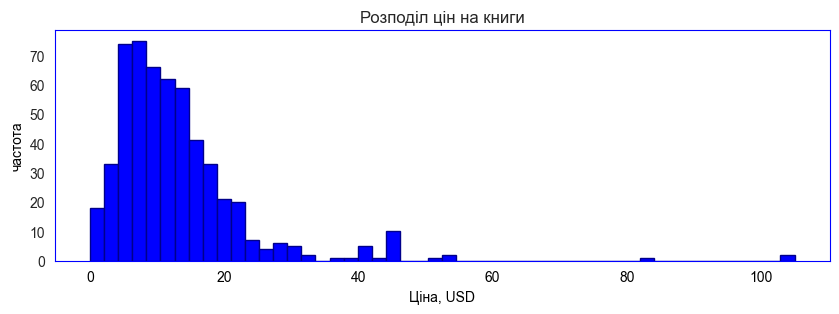

In [559]:
df["price"].plot(
    kind="hist", bins=50, color="blue", edgecolor="darkblue", figsize=(10, 3)
)

plt.title("Розподіл цін на книги")
plt.xlabel("Ціна, USD")
plt.ylabel("частота")
plt.grid()

plt.show()

#### Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [560]:
print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна :   {df['price'].min()}")
print(f"Середня ціна    :  {df['price'].mean()}")
print(f"Медіанна ціна   :  {df['price'].median()}")

Максимальна ціна: 105
Мінімальна ціна :   0
Середня ціна    :  13.1
Медіанна ціна   :  11.0


> #### Максимальна ціна?   **Відповідь: 105**

> #### Мінімальна ціна? **Відповідь: 0**

> #### Середня ціна? **Відповідь: 13.1**

> #### Медіанна ціна? **Відповідь: 11.0**

## **Пошук та сортування даних**

> #### Який рейтинг у датасеті найвищий?  **Відповідь: 4.9**

In [561]:
max_rating = df["user_rating"].max()
max_rating

4.9

> #### Скільки книг мають такий рейтинг?   **Відповідь: 28**

In [563]:
# top_rated_books = df[df["user_rating"] == max_rating].drop_duplicates(subset=['name'])
df_uni = df.drop_duplicates(subset=["name"])
top_rated_books = df_uni[df_uni["user_rating"] == max_rating]
len(top_rated_books)

28

> #### Яка книга має найбільше відгуків?  **Відповідь:** Where the Crawdads Sing by Delia Owens

In [564]:
# df[df["reviews"] == df["reviews"].max()]["name"].to_string(index=False)
df[df["reviews"] == df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


> #### З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?  
> #### **Відповідь:** Publication Manual of the American Psychological Association

In [565]:
top_2015 = df[(df["year"] == 2015)]
top_2015[top_2015["price"] == top_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


> #### Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?  **Відповідь: 20**

In [566]:
top_50_2010 = df[(df["year"] == 2010) & (df["genre"] == "Fiction")]
len(top_50_2010)

20

> #### Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?  **Відповідь: 1**

In [567]:
df[(df["user_rating"] == 4.9) & (df["year"].isin([2010, 2011]))].drop_duplicates(subset=['name']).shape[0]

1

#### І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [568]:
books_2015 = df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by="price")
books_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


> #### Яка книга остання у відсортованому списку?  **Відповідь:** Old School (Diary of a Wimpy Kid #10)

In [569]:
books_2015.iloc[-1]['name']

'Old School (Diary of a Wimpy Kid #10)'

## **Агрегування даних та з'єднання таблиць**

#### Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [570]:
grouped_by_genre = df.groupby("genre", as_index=False)
aggregated_prices = grouped_by_genre["price"].agg(["max", "min"])
aggregated_prices

,genre,max,min
0,Fiction,82,0
1,Non Fiction,105,0


> #### Максимальна ціна для жанру Fiction  **Відповідь:** 82

> #### Мінімальна ціна для жанру Fiction  **Відповідь:** 0

> #### Максимальна ціна для жанру Non Fiction  **Відповідь:** 105

> #### Мінімальна ціна для жанру Non Fiction  **Відповідь:** 0

#### Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберіть тільки потрібні

In [571]:
grouped_by_author = df_uni.groupby("author", as_index=False)
aggregated_authors = grouped_by_author["name"].agg(["count"])
aggregated_authors.head()
# aggregated_authors

,author,count
0,Abraham Verghese,1
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1


> #### Якої розмірності вийшла таблиця? **Відповідь:** 248 рядків

In [572]:
aggregated_authors.shape[0]

248

> #### Який автор має найбільше книг?  **Відповідь:** Jeff Kinney

In [573]:
max_count_index = aggregated_authors["count"].idxmax()
aggregated_authors.loc[max_count_index, "author"]

'Jeff Kinney'

> #### Скільки книг цього автора?  **Відповідь:** 12

In [574]:
aggregated_authors.loc[max_count_index, "count"]

12

#### Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [575]:
aggregated_authors_mean = grouped_by_author["user_rating"].agg(["mean"])
aggregated_authors_mean["mean"] = aggregated_authors_mean["mean"].round(2)
aggregated_authors_mean.head()
# aggregated_authors_mean

,author,mean
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7


> #### У якого автора середній рейтинг мінімальний?  **Відповідь:** Donna Tartt

In [576]:
min_rating_index = aggregated_authors_mean["mean"].idxmin()
aggregated_authors_mean.loc[min_rating_index, "author"]

'Donna Tartt'

> #### Який у цього автора середній рейтинг?  **Відповідь:** 3.9

In [577]:
aggregated_authors_mean.loc[min_rating_index, "mean"]

3.9

#### З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [578]:
combined_df_uni = pd.concat(
    [
        aggregated_authors.set_index("author"),
        aggregated_authors_mean.set_index("author"),
    ],
    axis=1,
).reset_index()
combined_df_uni.head()
# combined_df

,author,count,mean
0,Abraham Verghese,1,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


#### Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [579]:
combined_sort = combined_df_uni.sort_values(by=["count", "mean"], ascending=[True, True]).head()
combined_sort

,author,count,mean
71,Donna Tartt,1,3.9
90,Gallup,1,4.0
100,Gillian Flynn,1,4.0
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1


> #### Який автор перший у списку? **Відповідь:** Donna Tartt	

In [580]:
combined_sort.iloc[0]["author"]

'Donna Tartt'

## **Візуалізація**

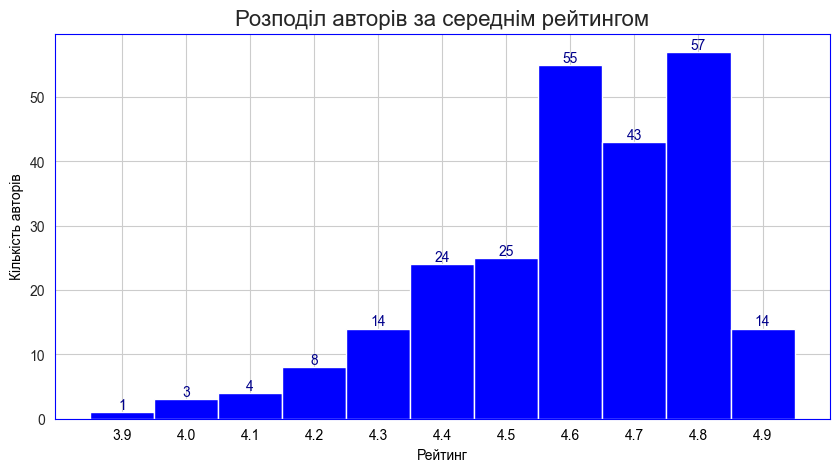

In [581]:
aggregated_authors_mean = grouped_by_author["user_rating"].agg(["mean"])
aggregated_authors_mean["mean"] = aggregated_authors_mean["mean"].round(1)

aggregated_authors_mean["mean_count"] = aggregated_authors_mean["mean"]
ratings_count = aggregated_authors_mean.groupby("mean_count").size()

plt.figure(figsize=(10, 5))
x = ratings_count.index  # Середні рейтинги
y = ratings_count.values  # Кількість авторів

bars = plt.bar(x, y, width=0.1, align="center", color="blue")
plt.xlabel("Рейтинг")
plt.ylabel("Кількість авторів")
plt.title("Розподіл авторів за середнім рейтингом", fontsize=16)
plt.xticks(x, rotation=0, ha="center", fontsize=10)

for bar in bars:
    val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        val,
        round(val, 0),
        va="bottom",
        ha="center",
        color="darkblue",
    )
plt.show()

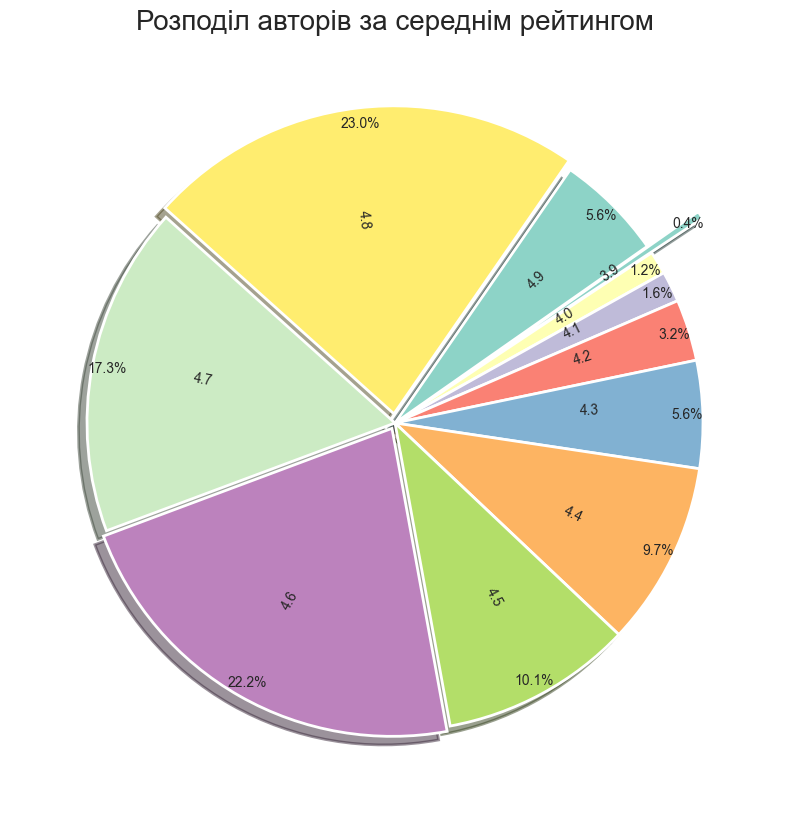

In [634]:
aggregated_authors_mean = grouped_by_author["user_rating"].agg(["mean"])
aggregated_authors_mean["mean"] = aggregated_authors_mean["mean"].round(1)

aggregated_authors_mean["mean_count"] = aggregated_authors_mean["mean"]
ratings_count = aggregated_authors_mean.groupby("mean_count").size()

plt.figure(figsize=(10, 10))
plt.pie(
    x=ratings_count.values,
    explode=(0.2, 0, 0, 0, 0, 0, 0, 0.02, 0, 0.03, 0),
    labels=ratings_count.index,
    pctdistance=0.95,
    labeldistance=0.6,
    autopct="%1.1f%%",
    shadow=True,
    radius=1,
    counterclock=False,
    startangle=35,
    wedgeprops={"linewidth": 2},
    rotatelabels=True,
)
plt.title("Розподіл авторів за середнім рейтингом", fontsize=20)
plt.show()

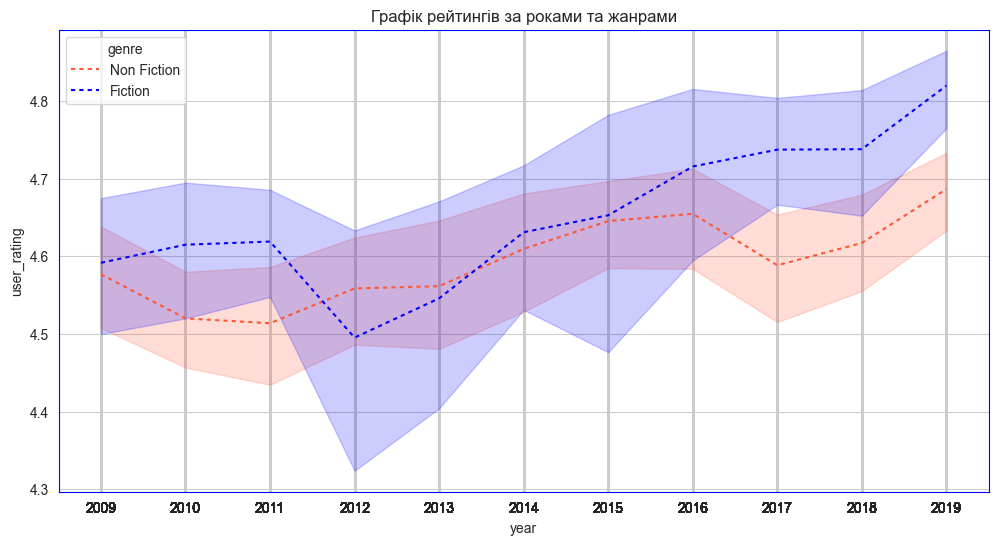

In [583]:
sns.set_style(
    "whitegrid",
    {
        "axes.edgecolor": "blue",
        # "axes.labelcolor": "black",
        # "xtick.color": "black",
    },
)
plt.figure(figsize=(12, 6))
plt.title("Графік рейтингів за роками та жанрами")
sns.lineplot(
    x="year",
    y="user_rating",
    hue="genre",
    palette=["#FF5733", "blue"],
    dashes=[2, 2],
    data=df,
)

plt.xticks(
    df["year"], rotation=0, ha="center"
)  

plt.show()

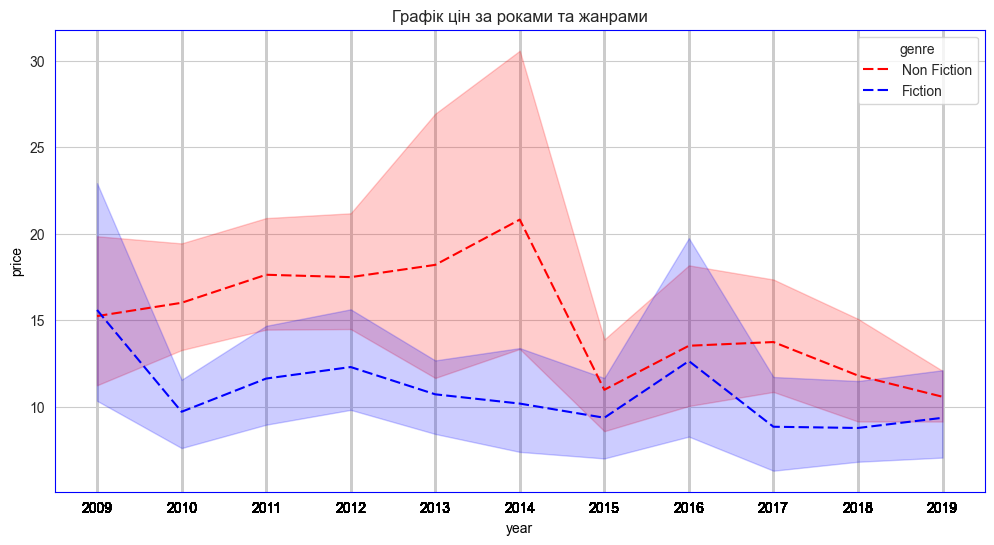

In [584]:
sns.set_style(
    "whitegrid",
    {
        "axes.edgecolor": "blue",
        "axes.labelcolor": "black",
        "xtick.color": "black",
    },
)
plt.figure(figsize=(12, 6))
plt.title("Графік цін за роками та жанрами")
sns.lineplot(
    x="year", y="price", hue="genre", palette=["red", "blue"], dashes=[5, 2], data=df
)
plt.xticks(df["year"], rotation=0, ha="center")
plt.show()

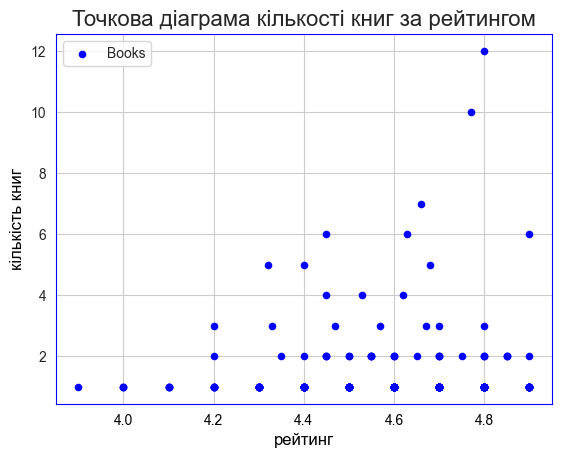

In [585]:
combined_df_uni.plot.scatter(y="count", x="mean", color="blue")
plt.ylabel("кількість книг", fontsize=12)
plt.xlabel("рейтинг", fontsize=12)
plt.title("Точкова діаграма кількості книг за рейтингом", fontsize=16)

plt.legend(["Books"], loc="best")

plt.show()